# Models for J1257 QPO
Notebook to study characteristic frequencies of different QPO models applied to the supermassive black hole 2MASXJ12571076+2724177

Known parameters:
* $M = 10^{6.3} M_\odot$
* $\nu = 3.3 * 10^{-5}$ HZ
* $d = 90$ Mpc

let's look for a range of frequencies and masses around these parameters

### General settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from setup import *
from plts_funcs import *

## RELATIVISTIC PRECESSION MODEL

in this model the QPO frequency is generally identified with the Lense-Thirring precesion around a spinning compact object.
alternatively, also the periastreon precession frequency or the rotation frequency can be associated with it.

in any case, the frequencies will only depend on three parameters: the mass of the objecy, its spin, and distance from the central object

> OSS: the Kerr frequencies are inddependent on the sign of the spin, so prograde and retrograde spins give the same resulkts! 

> However, they are not equivalent because the values of the ISCO are different in the two cases, so frequencies matching for prograde spin at a certain radius will not match also for retrograde spin if this radius is lower than the ISCO (ISCO increases with decreasing spin)

In [2]:
#functions for plots

def select(a_match, n_pick=10):
    a_match = np.array(a_match)
    # Sample a few spin values for clarity
    idx = np.linspace(0, len(a_match)-1, n_pick).astype(int)
    a_sampled = a_match[idx]
    return a_sampled

def plot_nu_vs_r(a_sampled, M, label, title, model):
    plt.figure(figsize=(9,6))

    for a in a_sampled:
        r_grid = np.linspace(r_isco(a), 1e4, 800)
        freq = np.array([model(r, a, M) for r in r_grid])
        plt.plot(r_grid, freq, label=f"a = {a:.5f}")
        
    r_gr0 = np.linspace(r_isco(1), 1e4, 800)
    # Target frequency band
    plt.fill_between(r_gr0, TARGET_MIN, TARGET_MAX, color='gray', alpha=0.2,
                    label="Target range")
    plt.plot(r_gr0, np.ones_like(r_grid)*NU0, label="Target frequency")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("r  [GM/c²]")
    plt.ylabel(label)
    plt.title(title)
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


#### Let's start by considering the fixed mass given above

In [3]:
params = {
    "a": (0, 0.999, 1000),
    "r": (2, 300, 298),
    "M": (10**6.3, 10**6.4, 1)
}
labels = list(params.keys())
param_vectors, mesh_arrays = create_param_grid(params)

A, R, M = mesh_arrays

In [4]:
print((Rg_SUN * M[0,0,:]) / AU)

[0.01969449]


> 2*10^-2 AU

##### first, LT precession

In [5]:
LT_freq = nu_LT(R, A, M)

LT_matches = find_matches(
    mesh_arrays=mesh_arrays,
    labels=labels,
    param_vectors=param_vectors,
    frq_fun=nu_LT
)

In [6]:
LT_matches

,a,r,M,freq
0,0.237,6.013468,1.995262e+06,0.000033
1,0.238,6.013468,1.995262e+06,0.000033
2,0.239,6.013468,1.995262e+06,0.000033
3,0.240,6.013468,1.995262e+06,0.000033
4,0.241,6.013468,1.995262e+06,0.000033
5,0.393,7.016835,1.995262e+06,0.000033
6,0.394,7.016835,1.995262e+06,0.000033
7,0.395,7.016835,1.995262e+06,0.000033
8,0.396,7.016835,1.995262e+06,0.000033
9,0.397,7.016835,1.995262e+06,0.000033


- a > 0.2 - r tra 6 e 9 Rg = tra 0.12 e 0.18 AU
- a tra -0.641 e -0.525 - r circa 8, circa uguale all'isco
- a < -0.993 - r circa 9 cioè isco

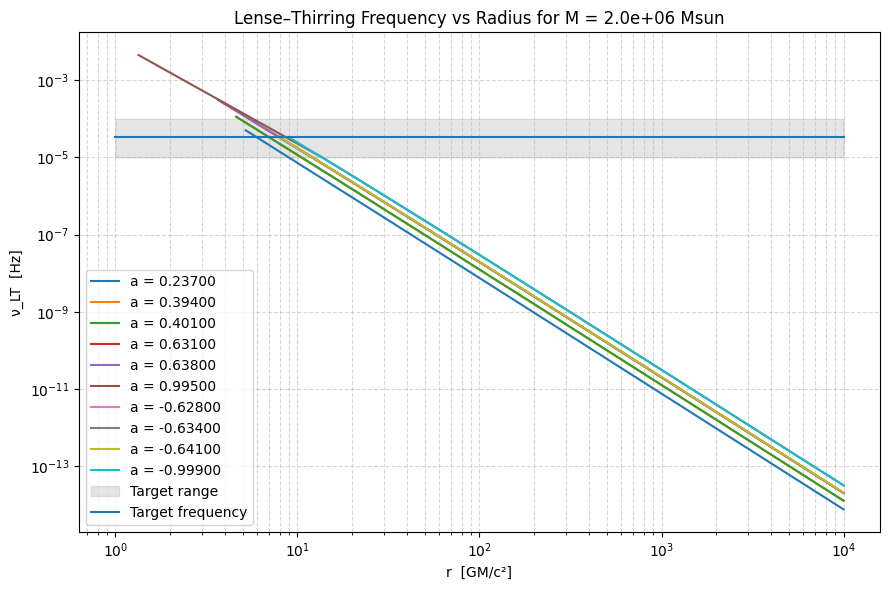

In [7]:
# -----------------------------
# PLOT 1: ν_LT(r) FOR DIFFERENT SPINS
# -----------------------------
a_selected = select(LT_matches["a"], 10)
title = f"Lense–Thirring Frequency vs Radius for M = {M_BH:.1e} Msun"
label = "ν_LT  [Hz]"
plot_nu_vs_r(a_selected, M_BH, label, title, nu_LT)


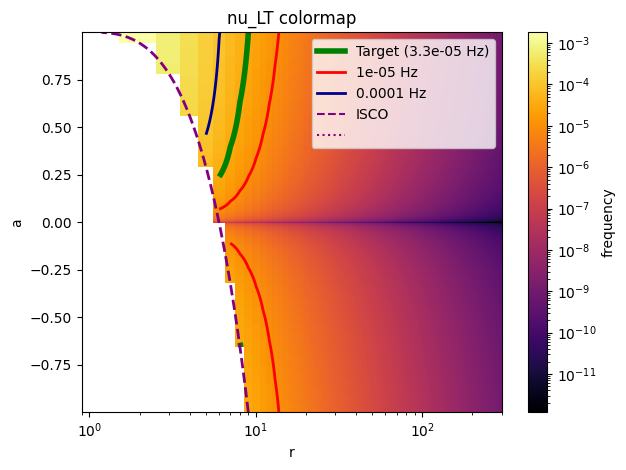

In [8]:
plt.Figure(figsize=(9,6))
plot_param_colormap(
    mesh_arrays,
    labels,
    freq_grid=LT_freq,
    x_param="r",
    y_param="a",
    log_x=True,
    title="nu_LT colormap",
)
plt.tight_layout()
plt.show()

conferm a quanto visto sopra, di fatto sere solamente uno spin non troppo piccolo in modulo, poi si trova sempre nel range per raggi tra 6 e 9
> r aumenta con valore assoluto dello spin

##### second, periastron precession

In [9]:
per_freq = nu_per(R, A, M)

per_matches = find_matches(
    mesh_arrays=mesh_arrays,
    labels=labels,
    param_vectors=param_vectors,
    frq_fun=nu_per
)

/home/masterpops/IUSS_tesi/setup.py:52: RuntimeWarning: invalid value encountered in sqrt
  factor = np.sqrt(1 - (6)/r + (8*abs(a))/r**1.5 - (3*a**2)/r**2)


In [10]:
per_matches

,a,r,M,freq
0,0.018,19.057239,1.995262e+06,0.000033
1,0.019,19.057239,1.995262e+06,0.000033
2,0.020,19.057239,1.995262e+06,0.000033
3,0.021,19.057239,1.995262e+06,0.000033
4,0.022,19.057239,1.995262e+06,0.000033
...,...,...,...,...
313,-0.805,17.050505,1.995262e+06,0.000033
314,-0.806,17.050505,1.995262e+06,0.000033
315,-0.807,17.050505,1.995262e+06,0.000033
316,-0.808,17.050505,1.995262e+06,0.000033


/home/masterpops/IUSS_tesi/setup.py:52: RuntimeWarning: invalid value encountered in sqrt
  factor = np.sqrt(1 - (6)/r + (8*abs(a))/r**1.5 - (3*a**2)/r**2)


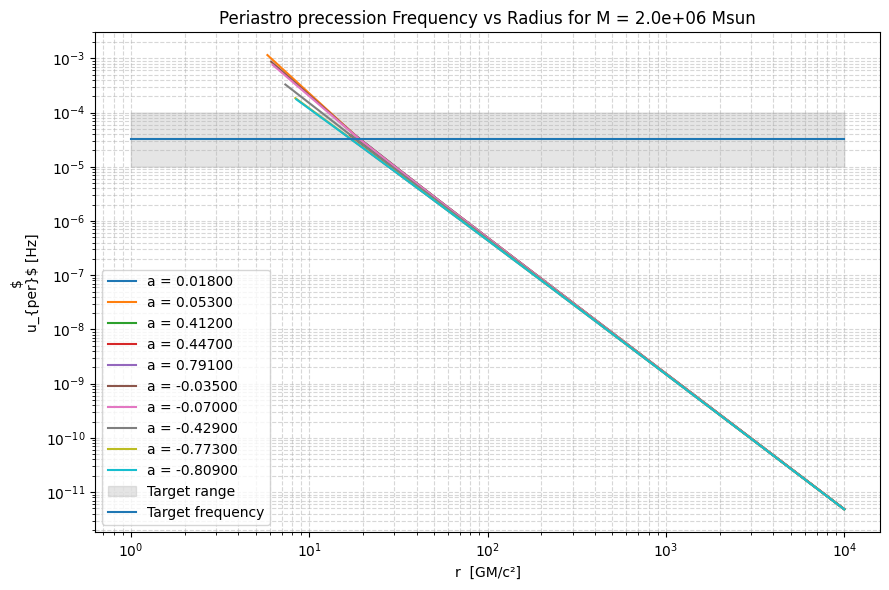

In [11]:
# -----------------------------
# PLOT 1: ν_per(r) FOR DIFFERENT SPINS
# -----------------------------
a_selected = select(per_matches["a"], 10)
title = f"Periastro precession Frequency vs Radius for M = {M_BH:.1e} Msun"
label = "$\nu_{per}$ [Hz]"
plot_nu_vs_r(a_selected, M_BH, label, title, nu_per)

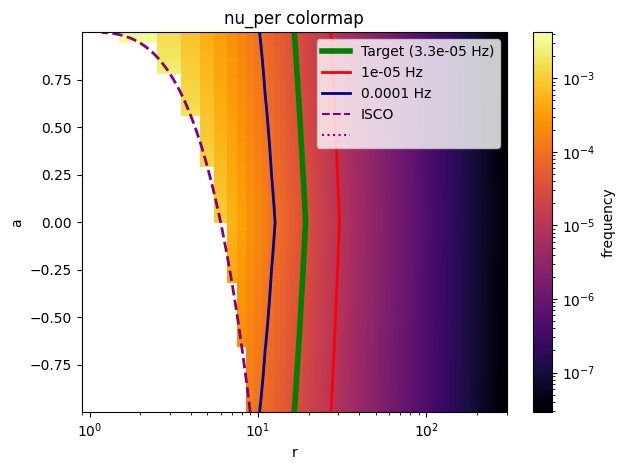

In [12]:
plt.Figure(figsize=(9,6))
plot_param_colormap(
    mesh_arrays,
    labels,
    freq_grid=per_freq,
    x_param="r",
    y_param="a",
    log_x=True,
    title="nu_per colormap",
)
plt.tight_layout()
plt.show()

tutti gli spin - raggi tra 17 e 19 Rg = 
> r decresce col valore assoluto dello spin!, infatti nella formula di nu_r io spin al èrimo ordine entra con un segno opposto rispetto a nu_theta

##### third, rotation frequency

In [13]:
phi_freq = nu_phi(R, A)

phi_matches = find_matches(
    mesh_arrays=mesh_arrays,
    labels=labels,
    param_vectors=param_vectors,
    frq_fun=nu_phi
)

phi_matches

,a,r,M,freq
0,0.000,62.20202,1.995262e+06,0.000033
1,0.001,62.20202,1.995262e+06,0.000033
2,0.002,62.20202,1.995262e+06,0.000033
3,0.003,62.20202,1.995262e+06,0.000033
4,0.004,62.20202,1.995262e+06,0.000033
...,...,...,...,...
1995,-0.995,62.20202,1.995262e+06,0.000033
1996,-0.996,62.20202,1.995262e+06,0.000033
1997,-0.997,62.20202,1.995262e+06,0.000033
1998,-0.998,62.20202,1.995262e+06,0.000033


tutti gli spin - raggio costante a 62 rg = 
> r indip da spin perché nella formula di nu_phi compare al denominatore come variazione sul raggio elevato alla 3/2, ma per raggi grandi la variazione data dallo spin è trascurabile (perché sta tra -1 e 1)

/tmp/ipykernel_7457/2202829036.py:31: UserWarning: Glyph 11 () missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/masterpops/IUSS_tesi/PITONE/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


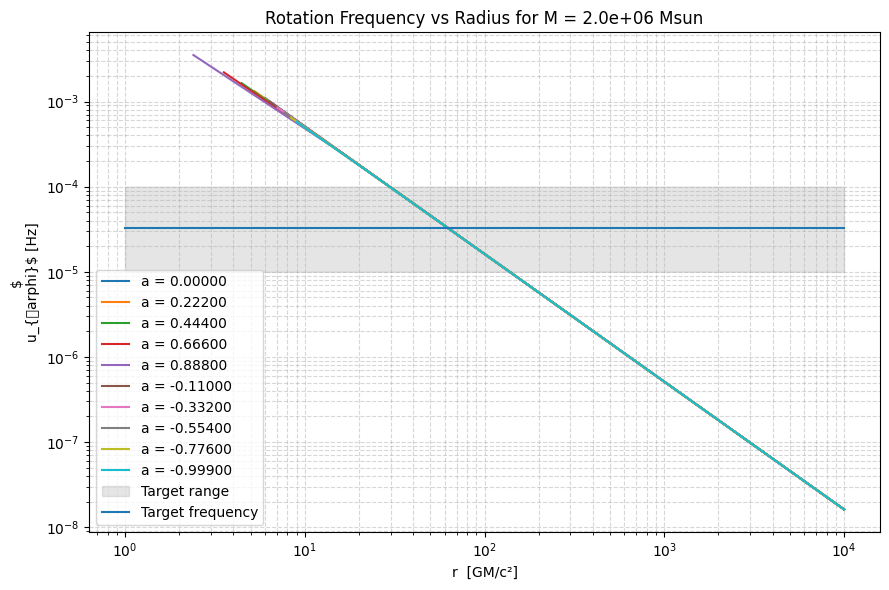

In [14]:
# Plot ν_phi(r) for different spins
a_selected = select(phi_matches["a"], 10)
title = f"Rotation Frequency vs Radius for M = {M_BH:.1e} Msun"
label = "$\nu_{\varphi}$ [Hz]"
plot_nu_vs_r(a_selected, M_BH, label, title, nu_phi)

conferma la poca variabilità!

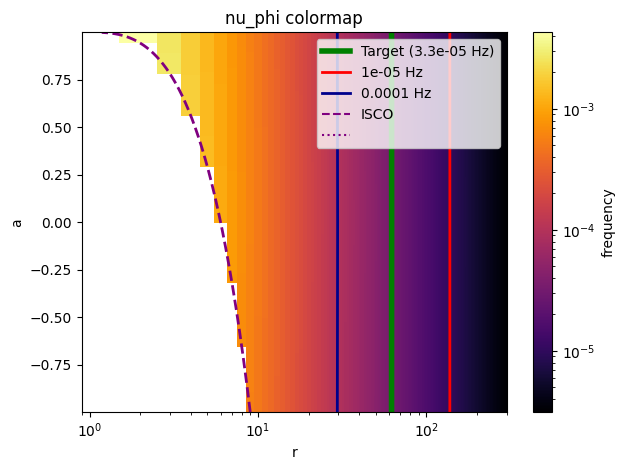

In [15]:
plt.Figure(figsize=(9,6))
plot_param_colormap(
    mesh_arrays,
    labels,
    freq_grid=phi_freq,
    x_param="r",
    y_param="a",
    log_x=True,
    title="nu_phi colormap",
)
plt.tight_layout()
plt.show()

#### now let's study varying masses in the range 6-7

In [16]:
params2 = {
    "a": (0, 0.999, 1000),
    "r": (2, 300, 298),
    "M": (10**6, 10**7, 100)
}
labels2 = list(params2.keys())
param_vectors2, mesh_arrays2 = create_param_grid(params2)

A2, R2, M2 = mesh_arrays2

In [17]:
# conversione raggi gravitazionali in AU per capire meglio
R_AU = (Rg_SUN * M2[0,0,:]) / AU
R_AU

array([0.00987063, 0.01076796, 0.01166529, 0.01256262, 0.01345995,
       0.01435728, 0.01525461, 0.01615194, 0.01704927, 0.0179466 ,
       0.01884393, 0.01974126, 0.02063859, 0.02153592, 0.02243325,
       0.02333058, 0.02422791, 0.02512524, 0.02602257, 0.0269199 ,
       0.02781723, 0.02871456, 0.02961189, 0.03050922, 0.03140655,
       0.03230388, 0.03320121, 0.03409854, 0.03499587, 0.0358932 ,
       0.03679053, 0.03768786, 0.03858518, 0.03948251, 0.04037984,
       0.04127717, 0.0421745 , 0.04307183, 0.04396916, 0.04486649,
       0.04576382, 0.04666115, 0.04755848, 0.04845581, 0.04935314,
       0.05025047, 0.0511478 , 0.05204513, 0.05294246, 0.05383979,
       0.05473712, 0.05563445, 0.05653178, 0.05742911, 0.05832644,
       0.05922377, 0.0601211 , 0.06101843, 0.06191576, 0.06281309,
       0.06371042, 0.06460775, 0.06550508, 0.06640241, 0.06729974,
       0.06819707, 0.0690944 , 0.06999173, 0.07088906, 0.07178639,
       0.07268372, 0.07358105, 0.07447838, 0.07537571, 0.07627

> ok raggi spannano da 0.01 a 0.1 AU
>> in genere emissione X si ha da raggi interni, più caldi.
per SMBH sto disco si estende fino a centinaia di GIORNI LUCE (1 GL = 173 AU)

##### LT

In [18]:
LT_freq2 = nu_LT(R2, A2, M2)

LT_matches2 = find_matches(
    mesh_arrays=mesh_arrays2,
    labels=labels2,
    param_vectors=param_vectors2,
    frq_fun=nu_LT
)

In [19]:
LT_matches2

,a,r,M,freq
0,0.114,6.013468,1.000000e+06,0.000033
1,0.115,6.013468,1.000000e+06,0.000033
2,0.116,6.013468,1.000000e+06,0.000033
3,0.125,6.013468,1.090909e+06,0.000033
4,0.126,6.013468,1.090909e+06,0.000033
...,...,...,...,...
3623,-0.995,10.026936,1.454545e+06,0.000033
3624,-0.996,9.023569,2.000000e+06,0.000033
3625,-0.997,9.023569,2.000000e+06,0.000033
3626,-0.998,9.023569,2.000000e+06,0.000033


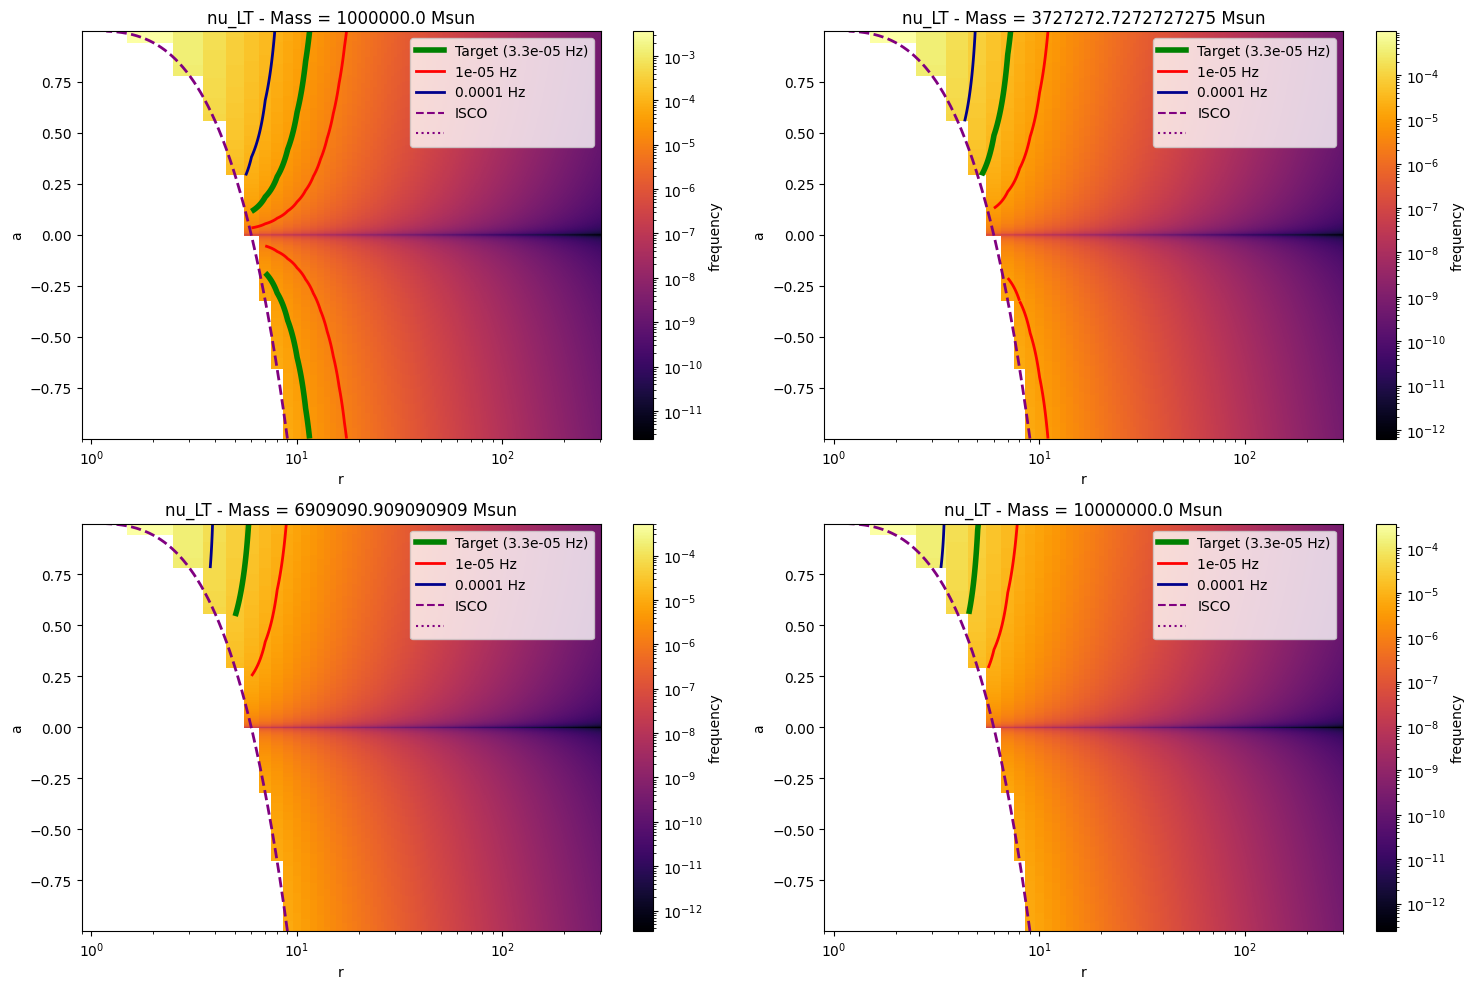

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

idx_values = [0, 30, 65, 99]

for ax, idx in zip(axes, idx_values):
    plt.sca(ax)  # imposta ax come asse corrente
    plot_param_colormap(
        mesh_arrays2,
        labels2,
        LT_freq2,
        x_param="r",
        y_param="a",
        idx_fix=idx,
        log_x=True,
        title=f"nu_LT - Mass = {M2[1, 1, idx]} Msun",
    )

plt.tight_layout()
plt.show()

se M aumenta, diventa più difficle trovare valori che matchino, servono:
- spin più grandi
- raggi più piccoli a partià di spin

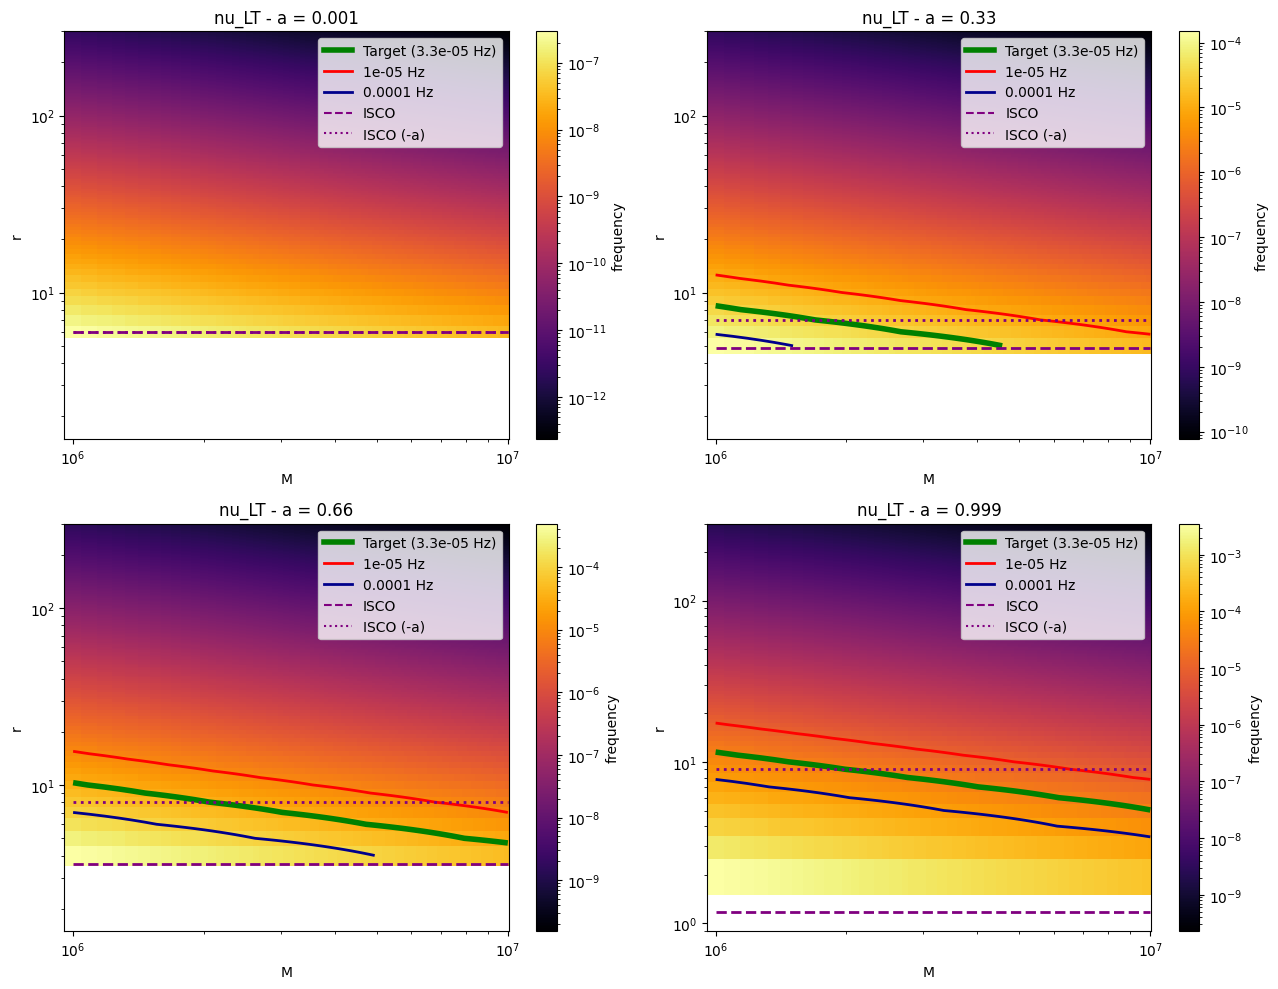

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(13, 10))
axes = axes.flatten()

idx_values = [1, 330, 660, 999]

for i, idx in enumerate(idx_values):
    plt.sca(axes[i])  # imposta ax come asse corrente
    plot_param_colormap(
        mesh_arrays2,
        labels2,
        LT_freq2,
        x_param="M",
        y_param="r",
        idx_fix=idx,
        log_x=True,
        log_y=True,
        title=f"nu_LT - a = {A2[idx, 1, 1]}",
    )

plt.tight_layout()
plt.show()

- spin 0 -> no precessione, ovvio
- spin > 0 -> aumentando spin si inizia ad avere compatibilità per masse più piccole. a parià di massa se aumenta lo spin aumenta il raggio a cui si trova copatibilità
- spin < 0 -> isco si sposta in alto quindi compatibilità solo per masse piccole (se accettiamo tolleranza ci si può spingere a valori più alti)
> per la massa minima e spin massimo arriva a 10 Rg = 0.11 AU (masaminimima)
> il minimimo invece è più tricky,ma sempre sopra i 4 Rg = 0.4 AU (massa max)

##### periastron

In [22]:
per_freq2 = nu_per(R2, A2, M2)

per_matches2 = find_matches(
    mesh_arrays=mesh_arrays2,
    labels=labels2,
    param_vectors=param_vectors2,
    frq_fun=nu_per
)

/home/masterpops/IUSS_tesi/setup.py:52: RuntimeWarning: invalid value encountered in sqrt
  factor = np.sqrt(1 - (6)/r + (8*abs(a))/r**1.5 - (3*a**2)/r**2)


In [23]:
per_matches2

,a,r,M,freq
0,0.000,11.030303,8.636364e+06,0.000033
1,0.000,11.030303,8.727273e+06,0.000033
2,0.000,12.033670,6.818182e+06,0.000033
3,0.000,12.033670,6.909091e+06,0.000033
4,0.000,13.037037,5.545455e+06,0.000033
...,...,...,...,...
20685,-0.999,14.040404,2.909091e+06,0.000033
20686,-0.999,15.043771,2.454545e+06,0.000033
20687,-0.999,16.047138,2.090909e+06,0.000033
20688,-0.999,17.050505,1.818182e+06,0.000033


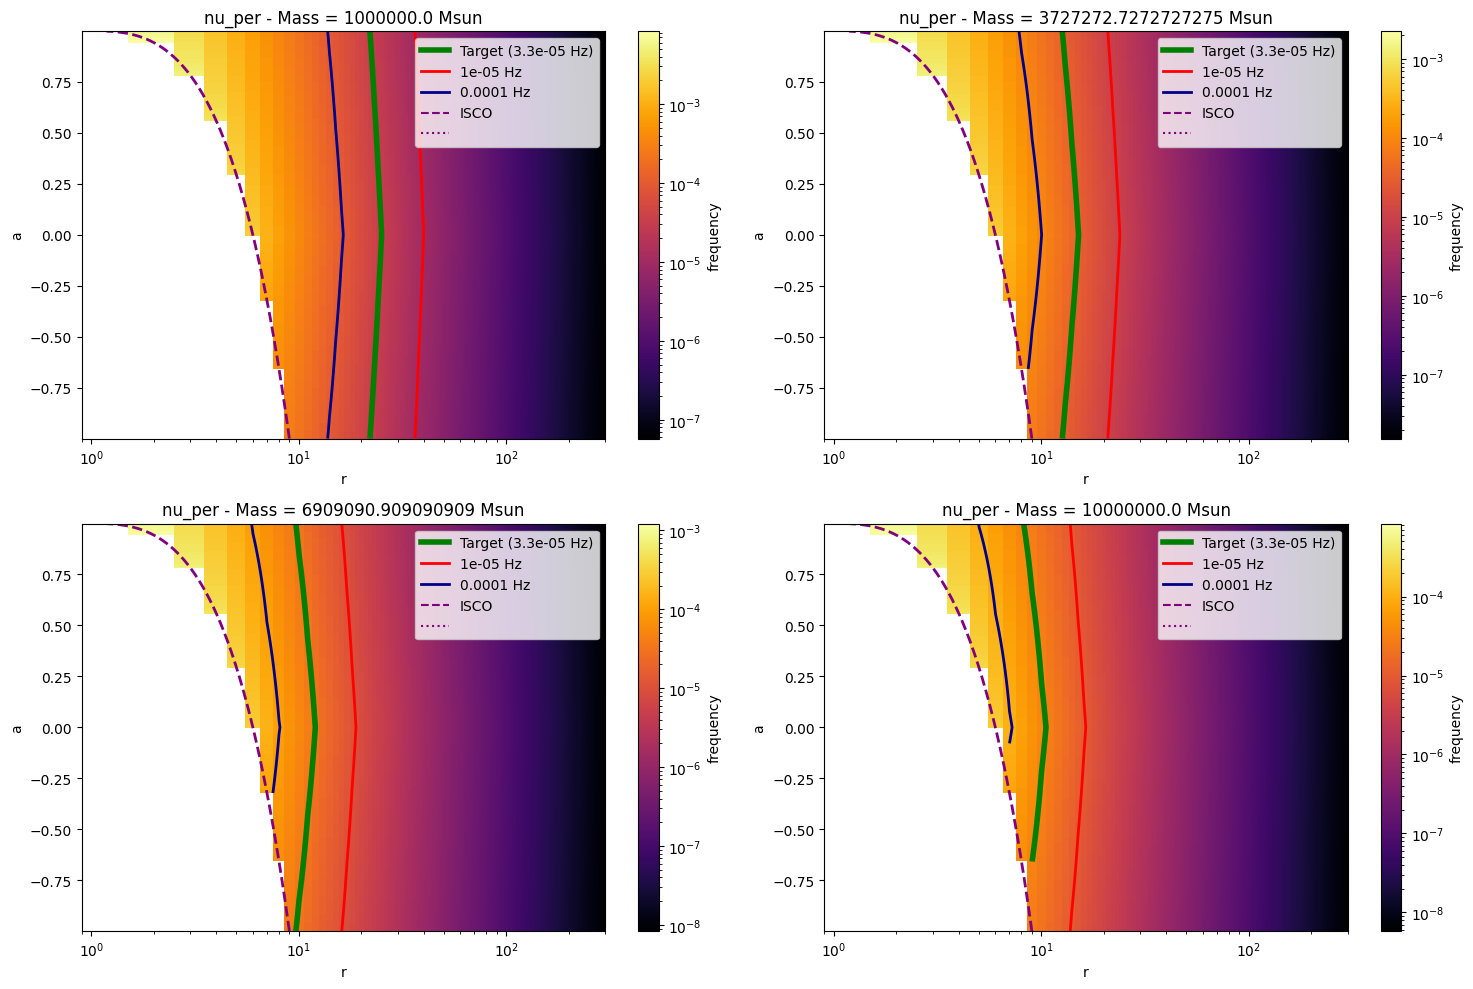

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

idx_values = [0, 30, 65, 99]

for ax, idx in zip(axes, idx_values):
    plt.sca(ax)  # imposta ax come asse corrente
    plot_param_colormap(
        mesh_arrays2,
        labels2,
        per_freq2,
        x_param="r",
        y_param="a",
        idx_fix=idx,
        log_x=True,
        title=f"nu_per - Mass = {M2[1, 1, idx]} Msun",
    )

plt.tight_layout()
plt.show()

- masssa ha effetto analogo a sopra, aumentandola non si ha più compatibilità per spin negativi grandi in modulo perché isco si alza e il raggio di match si stringe

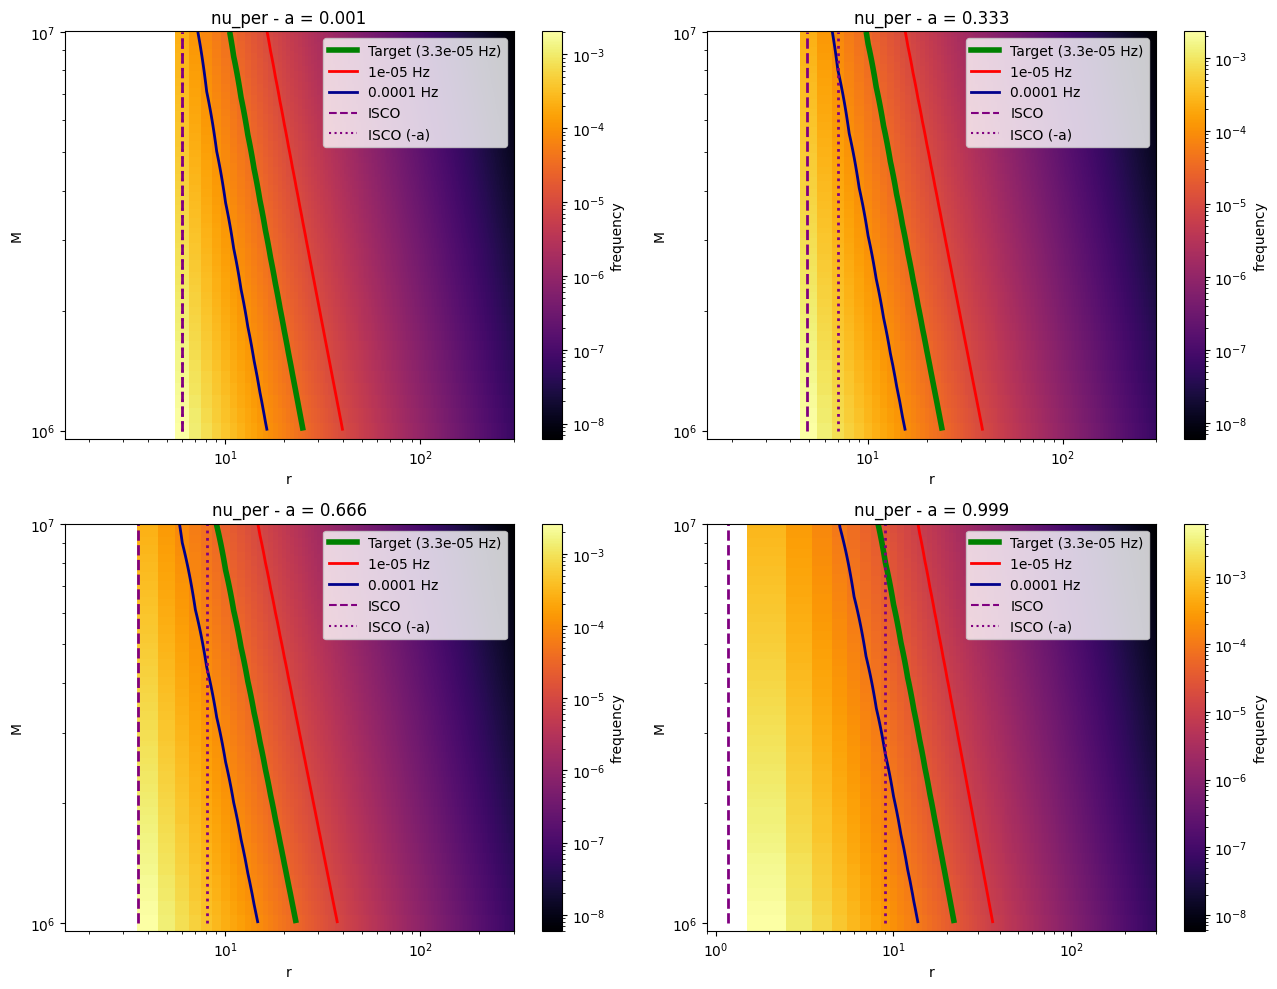

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(13, 10))
axes = axes.flatten()

idx_values = [1, 333, 666, 999]

for i, idx in enumerate(idx_values):
    plt.sca(axes[i])  # imposta ax come asse corrente
    plot_param_colormap(
        mesh_arrays2,
        labels2,
        per_freq2,
        x_param="r",
        y_param="M",
        idx_fix=idx,
        log_x=True,
        log_y=True,
        title=f"nu_per - a = {A2[idx, 1, 1]}",
    )

plt.tight_layout()
plt.show()

qualitativamente analogo a LT, con la differenza che c'è compatibilità anbche per spin nullo e anceh per spin negativi resta la compatibilità per tutte le masse perché il raggio di match aumenta col valore assoluto di a

> raggi poc variabili con massa, smempre tra 10 Rg = 1 Au (masssa max) e 30 Rg = 0.3 AU (massaa min)

##### orbital

In [26]:
phi_freq2 = nu_phi(R2, A2, M2)

phi_matches2 = find_matches(
    mesh_arrays=mesh_arrays2,
    labels=labels2,
    param_vectors=param_vectors2,
    frq_fun=nu_phi
)

In [27]:
phi_matches2

,a,r,M,freq
0,0.000,22.067340,9.363636e+06,0.000033
1,0.000,22.067340,9.454545e+06,0.000033
2,0.000,23.070707,8.818182e+06,0.000033
3,0.000,23.070707,8.909091e+06,0.000033
4,0.000,24.074074,8.272727e+06,0.000033
...,...,...,...,...
102459,-0.999,80.262626,1.363636e+06,0.000033
102460,-0.999,84.276094,1.272727e+06,0.000033
102461,-0.999,88.289562,1.181818e+06,0.000033
102462,-0.999,93.306397,1.090909e+06,0.000033


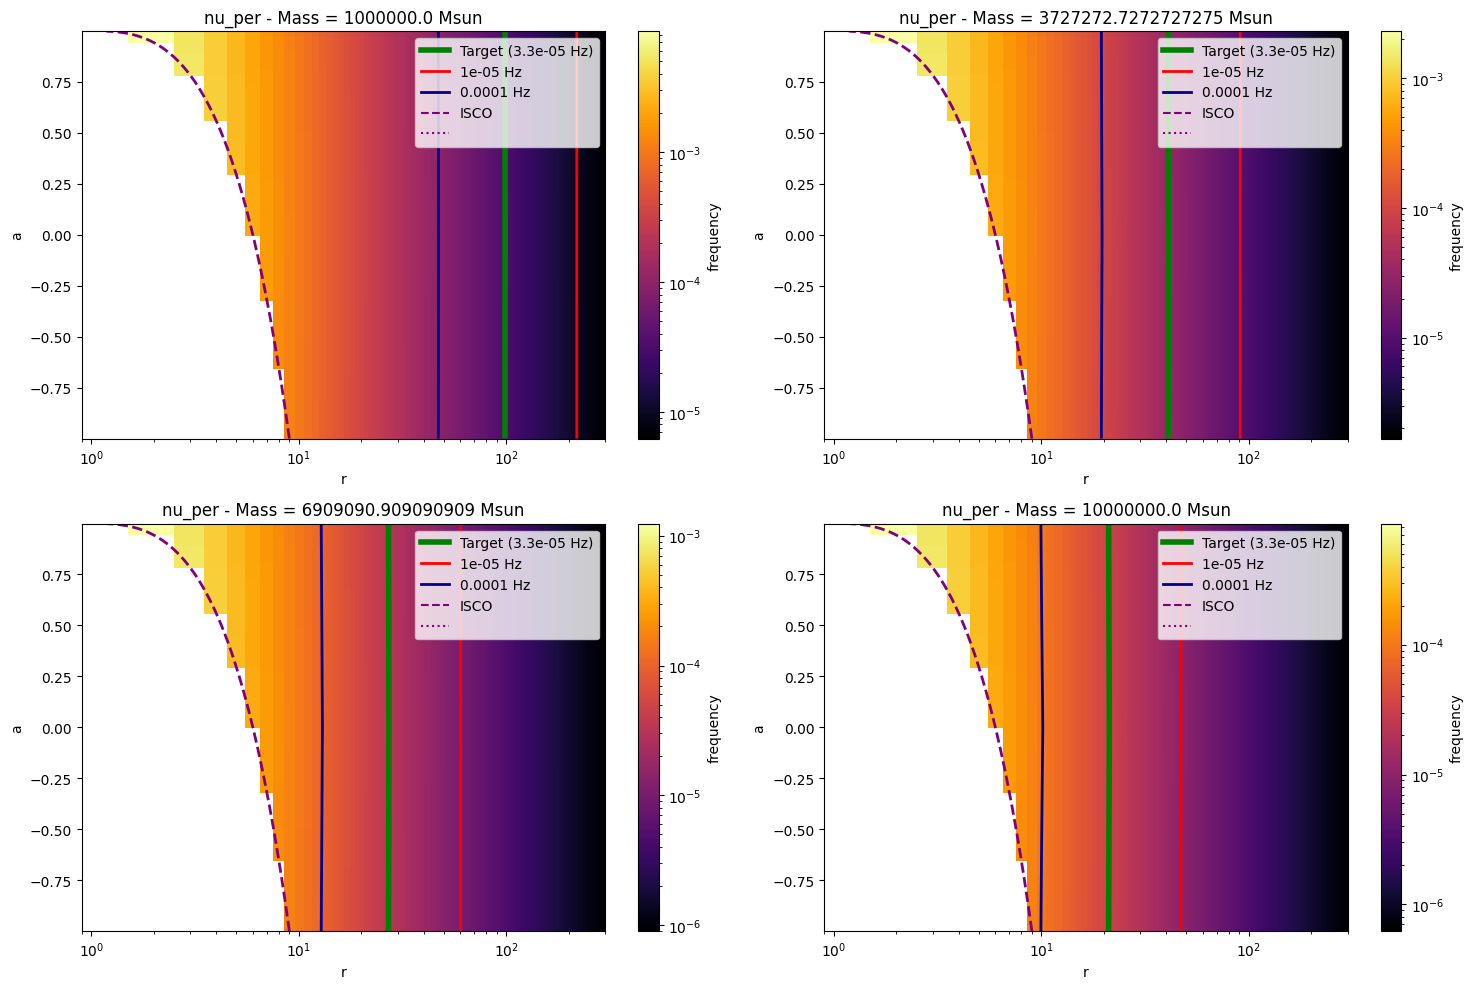

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

idx_values = [0, 30, 65, 99]

for ax, idx in zip(axes, idx_values):
    plt.sca(ax)  # imposta ax come asse corrente
    plot_param_colormap(
        mesh_arrays2,
        labels2,
        phi_freq2,
        x_param="r",
        y_param="a",
        idx_fix=idx,
        log_x=True,
        title=f"nu_per - Mass = {M2[1, 1, idx]} Msun",
    )

plt.tight_layout()
plt.show()

come sopra, massa stringe raggi (però in termini di raggi gravitazionali, non in termini assoluti)
- 10^6 -> 100 Rg = 1 AU
- 10^7 -> 30 Rg = 3 AU

resta compatibilità sempre per ogni spin perché motlo lontano da isco

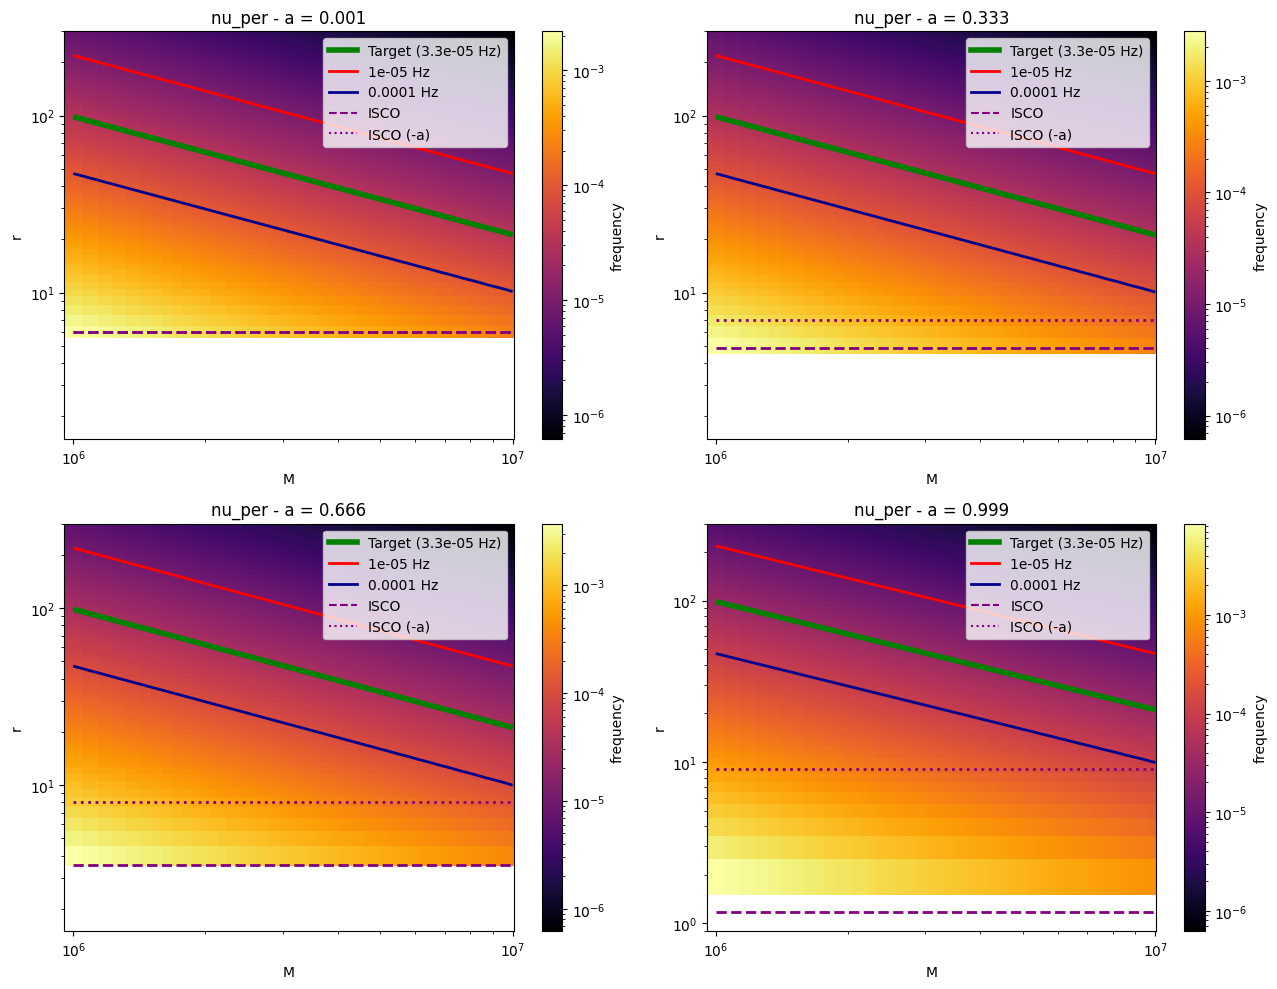

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(13, 10))
axes = axes.flatten()

idx_values = [1, 333, 666, 999]

for i, idx in enumerate(idx_values):
    plt.sca(axes[i])  # imposta ax come asse corrente
    plot_param_colormap(
        mesh_arrays2,
        labels2,
        phi_freq2,
        x_param="M",
        y_param="r",
        idx_fix=idx,
        log_x=True,
        log_y=True,
        title=f"nu_per - a = {A2[idx, 1, 1]}",
    )

plt.tight_layout()
plt.show()

come sopra, compatiile epr ogni massa e spin, con raggio che aumenta con spin e diminuisce con la massa
> variazione del raggi omolto grande! da 20 a 100 Rg!